## Arbol de decisión

### Alexander Villatoro 1182118
### Andres Galvez 1024718
### Sergio Lara 1044418
### Luis Chutá 1320016

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import os
import pyodbc 

In [19]:
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;DATABASE=RepuestosWeb;Trusted_Connection=yes;')

query = "select * from VW_OrdenesEncimaPromedio ;"
df = pd.read_sql(query, conn)
print(df.head(26))

      NombreCiudad Genero                ID_Parte  ID_Categoria  Total_Orden  \
0        San Diego      M  AC1100173CORE-ORIG.REC          1612     23139.50   
1           Tacoma      F      AC1320108-ORIG.REC          2827      1041.55   
2            Akron      M      AC1228119-ORIG.REC          3154      6207.45   
3         Richmond      M               AC1217107          3225     13022.11   
4           Dallas      F      AC2519105-ORIG.REC          4241      2145.25   
5       Shreveport      F      AC1100177-ORIG.REC          2512     14485.40   
6           Fresno      M              AC1114104C          2560      1950.12   
7           Boston      F               AC1249128          3847      5526.56   
8       Louisville      F               AC1228103          2598      6327.91   
9        St. Louis      M     AC1115103C-ORIG.REC          2746      8611.97   
10  St. Petersburg      M               AC1323113          3836     23412.15   
11         Lubbock      F               

In [20]:
df.drop('ID_Parte',axis=1,inplace=True)
df.drop('ID_Categoria',axis=1,inplace=True)
df.drop('Total_Orden',axis=1,inplace=True)
df

NombreCiudad Genero  TotalEncimaPromedio
0        San Diego      M                    1
1           Tacoma      F                    0
2            Akron      M                    0
3         Richmond      M                    1
4           Dallas      F                    0
...            ...    ...                  ...
11902       Denver      F                    0
11903      Buffalo      M                    1
11904       Tacoma      M                    1
11905  Bakersfield      F                    1
11906   Greensboro      F                    1

[11907 rows x 3 columns]

In [21]:
#Almacenar las variables X y Y por separado
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values
X

array([['San Diego', 'M'],
       ['Tacoma', 'F'],
       ['Akron', 'M'],
       ...,
       ['Tacoma', 'M'],
       ['Bakersfield', 'F'],
       ['Greensboro', 'F']], dtype=object)

In [22]:
#Con Enconder podremos codificar atributos no numericos segun una escala

le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X

array([[76, 1],
       [87, 0],
       [0, 1],
       ...,
       [87, 1],
       [8, 0],
       [34, 0]], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred  =  classifier.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [26]:
y_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [28]:
cm

array([[591, 610],
       [568, 613]], dtype=int64)

In [29]:
ac

0.5054575986565911

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from graphviz import Digraph
import pydotplus

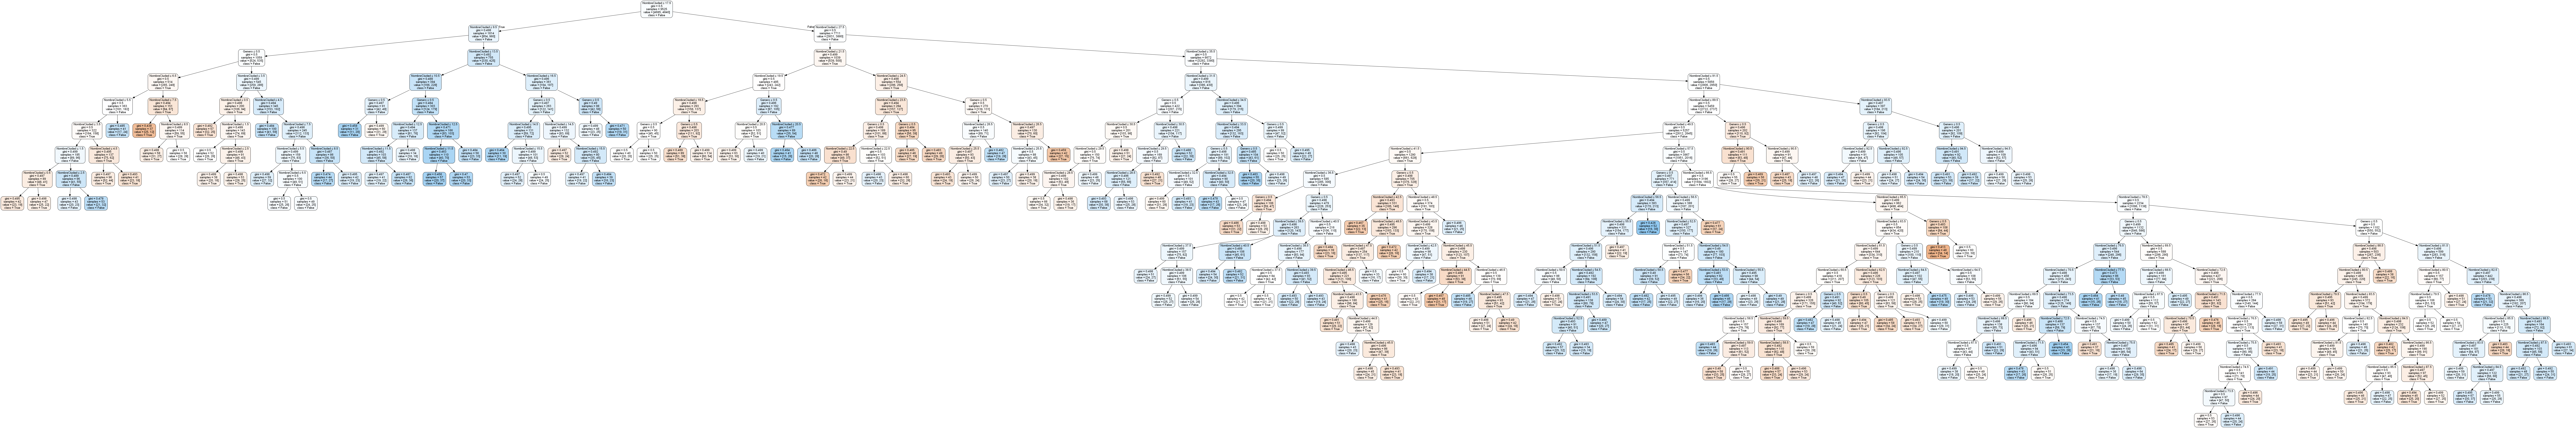

In [31]:
# PONER EL GRAFICO QUE LE CORRESPONDE AL TREE 
#grafica de arbol de decision
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = ["NombreCiudad","Genero"]
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['True','False'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('repuestos.png')
Image(graph.create_png())

In [32]:
import seaborn as sns

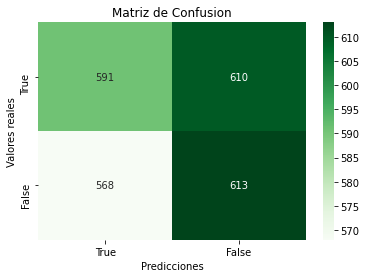

In [33]:
#ploteamos matriz de confusion
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicciones');ax.set_ylabel('Valores reales'); 
ax.set_title('Matriz de Confusion'); 
ax.xaxis.set_ticklabels(['True', 'False']); ax.yaxis.set_ticklabels(['True', 'False']);

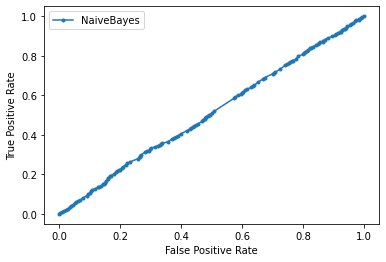

0.5105796679453545


In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
treeProb = roc_auc_score(y_test, lr_probs)
prueba1,prueba2,_ = roc_curve(y_test, lr_probs)
pyplot.plot(prueba1, prueba2, marker='.', label='NaiveBayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print(treeProb)


### ¿Cuál modelo es mejor y por qué?

Tomando en cuenta todas las variables, de la vista creada, que se utilizaron se estima que el algoritmo que mejor se adapta a este set de datos es el Árbol de decisiones. Esto es por que este no solo presenta una mejora en la precisión de la predicción sino que tomando en cuenta la teoria vista es mas preciso para nuestro caso ya que se puede crear una probabilidad para cada clase.